<a href="https://colab.research.google.com/github/divsal009/div/blob/master/CNN_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## **'Normal beats','Unknown Beats','Ventricular ectopic beats', 'Supraventricular ectopic beats','Fusion Beats'**

In [74]:
train_data=pd.read_csv('/content/drive/My Drive/Medical Data/ECG/mitbih_train.csv',header=None)

In [75]:
test_data=pd.read_csv('/content/drive/My Drive/Medical Data/ECG/mitbih_test.csv',header=None)

In [76]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA

In [77]:
train_data.isna().sum()


0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [78]:
#TARGET CONVERT TO INT
train_data.iloc[:, 187].unique()


array([0., 1., 2., 3., 4.])

In [79]:
train_data[187] = train_data[187].astype('int') 


In [80]:
test_data[187] = test_data[187].astype('int')


In [81]:
train_data[187].value_counts()


0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

<Figure size 1080x720 with 0 Axes>

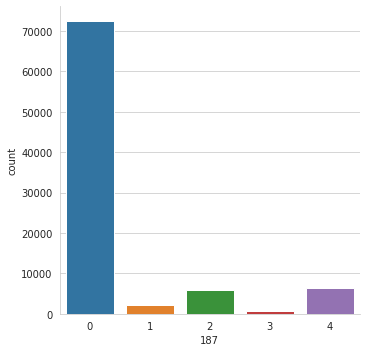

In [82]:
plt.figure(figsize=(15,10))
sns.catplot(x = 187, kind = 'count', data = train_data)
plt.show()

([<matplotlib.patches.Wedge at 0x7fdadf6aabe0>,
 [Text(-0.9427974976112825, 0.5666858728589446, ''),
  Text(0.7246136625914988, -0.8276080231521041, ''),
  Text(1.0074182091923962, -0.44171093691189695, ''),
  Text(1.091312106928212, -0.13797784340939367, ''),
  Text(1.0997090556586326, -0.025298081002296184, '')])

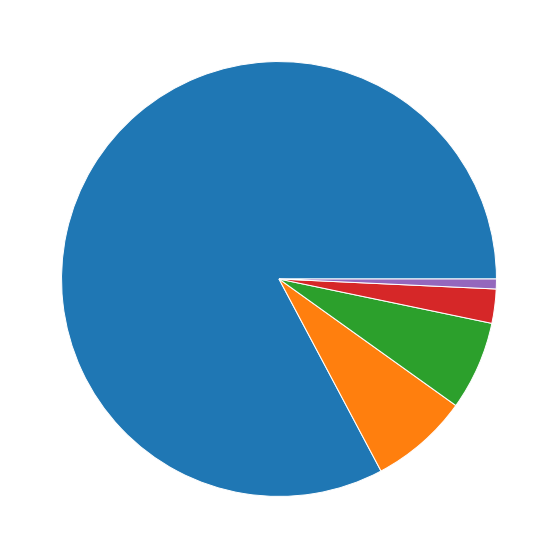

In [83]:
plt.figure(figsize=(10,10))
plt.pie(train_data[187].value_counts())

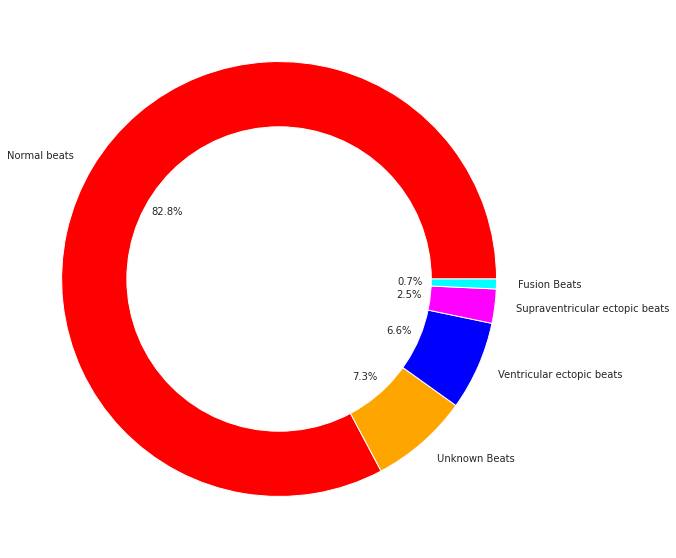

In [84]:
plt.figure(figsize=(10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(train_data[187].value_counts(), labels = ['Normal beats','Unknown Beats','Ventricular ectopic beats', 'Supraventricular ectopic beats','Fusion Beats'],
        colors = ['red', 'orange', 'blue', 'magenta', 'cyan'], autopct = '%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


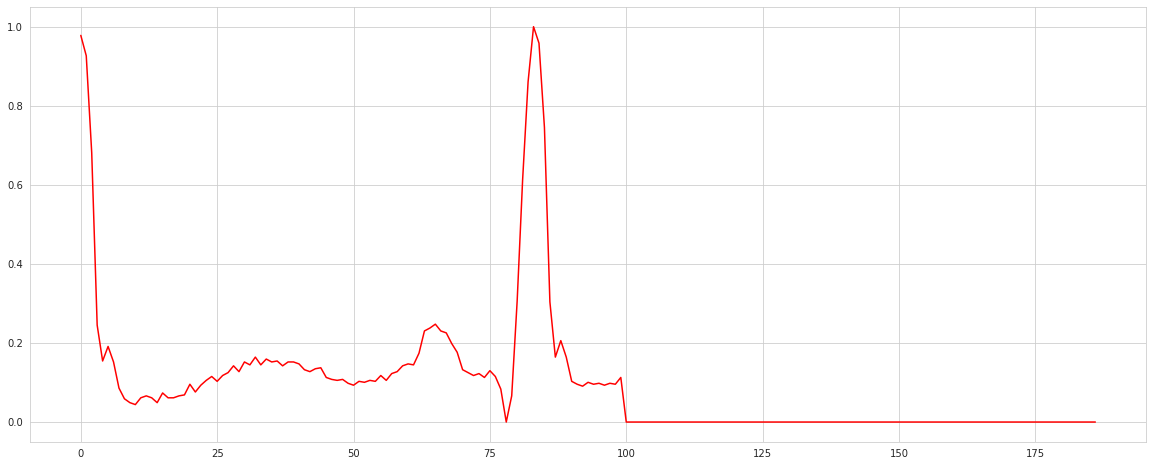

In [85]:
# Show Normal Heartbeat
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red')
plt.show()


In [86]:
# Splitting Data into Classwise C0 - C4
M = train_data.values
# Input Data - All the values except last column
X = M[:, :-1]
# Last Class column 
y = M[:, -1].astype('int')


In [87]:
# Splitting Data Indexes of various classes
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()


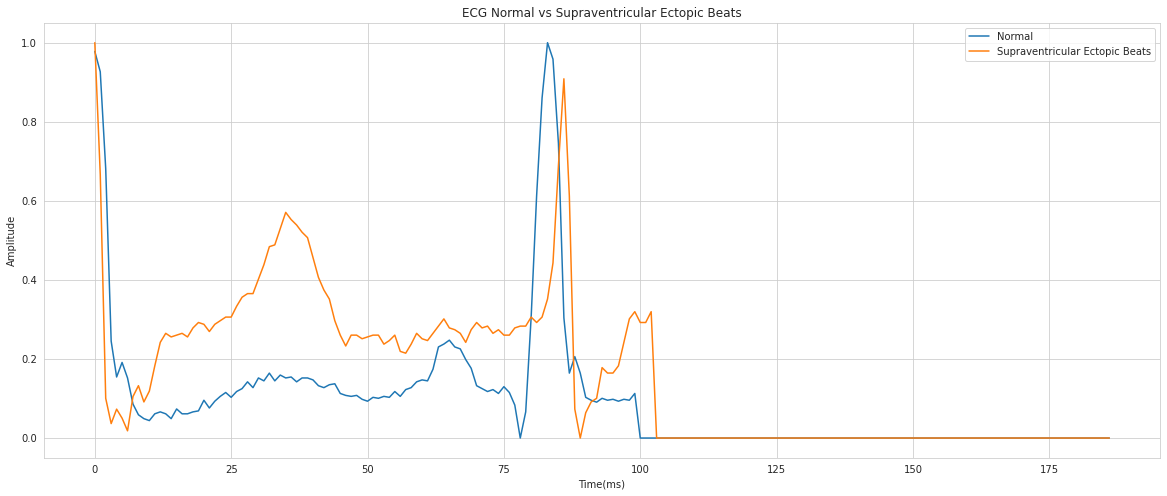

In [88]:
# Show Normal Heartbeat
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(X[C0, :][0], label = 'Normal')
plt.plot(X[C1, :][0], label = 'Supraventricular Ectopic Beats')
plt.title("ECG Normal vs Supraventricular Ectopic Beats")
plt.xlabel("Time(ms)")
plt.ylabel("Amplitude")
plt.legend()
plt.show() 


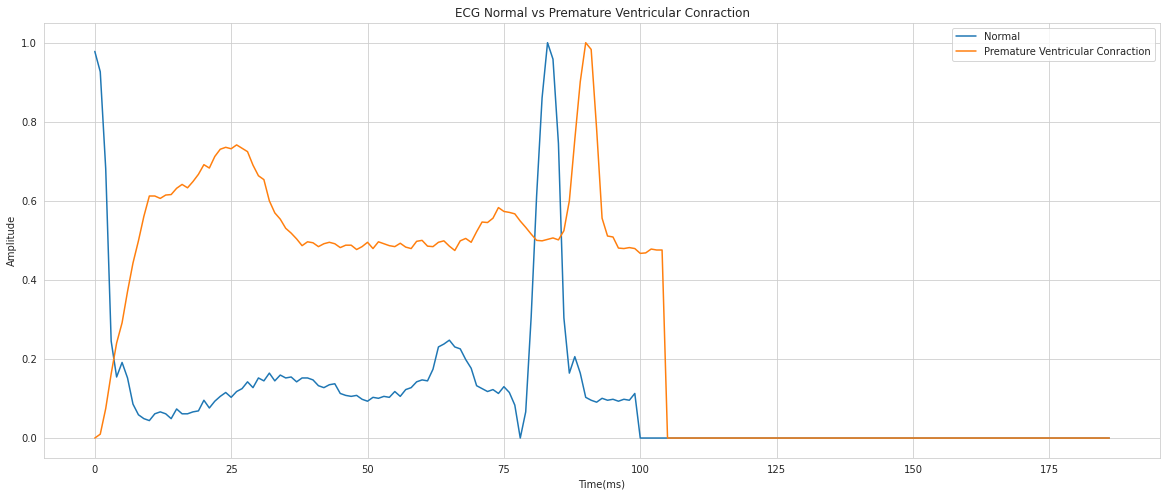

In [89]:
# Show Normal Heartbeat
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(X[C0, :][0], label = 'Normal')
plt.plot(X[C2, :][0], label = 'Premature Ventricular Conraction')
plt.title("ECG Normal vs Premature Ventricular Conraction")
plt.xlabel("Time(ms)")
plt.ylabel("Amplitude")
plt.legend()
plt.show() 



# **Data Augmentation**

In [90]:
train_data[187].value_counts()

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

In [91]:
from sklearn.utils import resample
df_1 = train_data[train_data[187] == 1]
df_2 = train_data[train_data[187] == 2]
df_3 = train_data[train_data[187] == 3]
df_4 = train_data[train_data[187] == 4]


In [92]:
df_1_upsample = resample(df_1 , n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2 , n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3 , n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4 , n_samples = 20000, replace = True, random_state = 123) 

In [93]:
# Select randomly 20000 data from Class == 0
df_0 = train_data[train_data[187] == 0].sample(n = 20000, random_state = 42)


In [94]:
# Merging all the dataframes
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])


In [95]:
train_df[187].value_counts()

4    20000
3    20000
2    20000
1    20000
0    20000
Name: 187, dtype: int64

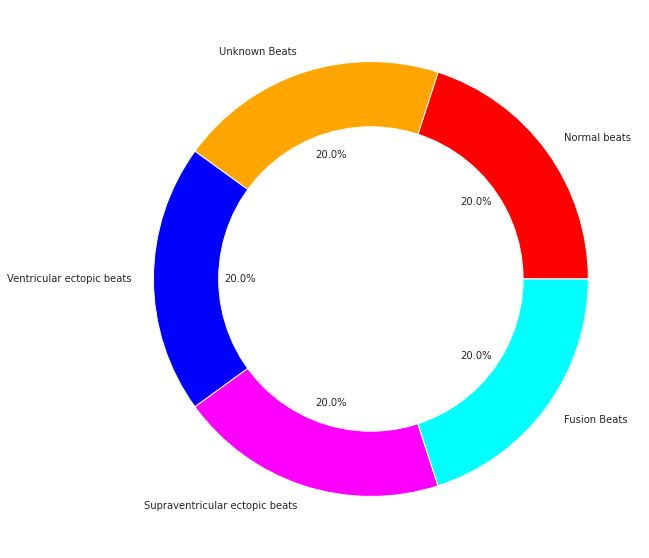

In [96]:
plt.figure(figsize=(10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(train_df[187].value_counts(), labels = ['Normal beats','Unknown Beats','Ventricular ectopic beats', 'Supraventricular ectopic beats','Fusion Beats'],
        colors = ['red', 'orange', 'blue', 'magenta', 'cyan'], autopct = '%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [97]:
target_train = train_df[187]
target_test = test_data[187]

In [98]:
from keras.utils.np_utils import to_categorical
# In MultiClass classification one hot Encoding is compulsory 
y_train = to_categorical(target_train)


# **one hot Encoding**

In [99]:
#0 [1,0,0,0,0]
#1[0,1,0,0,0]
#4[0,0,0,0,1]

In [100]:
y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [101]:
y_test = to_categorical(target_test)

# **Feature & Labels**

In [102]:
X_train = train_df.iloc[:, :-1].values
X_test = test_data.iloc[:, :-1].values

In [103]:
X_train.shape

(100000, 187)

In [104]:
X_train

array([[0.1627907 , 0.54069769, 0.75581396, ..., 0.        , 0.        ,
        0.        ],
       [0.99006623, 0.93874174, 0.34437087, ..., 0.        , 0.        ,
        0.        ],
       [0.97423887, 0.93208432, 0.59016395, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.98465961, 0.93480343, 0.87535954, ..., 0.        , 0.        ,
        0.        ],
       [0.92543411, 0.87538302, 0.81205314, ..., 0.        , 0.        ,
        0.        ],
       [0.98628694, 0.93776369, 0.87341774, ..., 0.        , 0.        ,
        0.        ]])

In [105]:
#Changing dimensionality -187X1
X_train=X_train.reshape(len(X_train),X_train.shape[1],1)

In [106]:
X_train
#Now can pass to CNN

array([[[0.1627907 ],
        [0.54069769],
        [0.75581396],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.99006623],
        [0.93874174],
        [0.34437087],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.97423887],
        [0.93208432],
        [0.59016395],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       ...,

       [[0.98465961],
        [0.93480343],
        [0.87535954],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.92543411],
        [0.87538302],
        [0.81205314],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.98628694],
        [0.93776369],
        [0.87341774],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

In [107]:
X_test=X_test.reshape(len(X_test),X_test.shape[1],1)

In [108]:
X_train.shape

(100000, 187, 1)

In [109]:
X_test.shape

(21892, 187, 1)

In [110]:
X_train.shape[1]

187

In [111]:
X_test.shape[1]

187

# **CNN MODEL**

In [112]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D,MaxPooling1D,Flatten
from keras.layers.normalization import BatchNormalization

In [113]:
# Batchnormalization : Avoiding overfitting, Increase the speed, performance & stability
# padding = same (zero padding)
def build_model():
  model = Sequential()
  # number of filters = number of units 
  # Convolution matrix
  model.add(Conv1D(filters = 64, kernel_size=6, activation='relu', padding = 'same', input_shape = (187,1)))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=(3), strides=(2), padding='same'))

  model.add(Conv1D(filters = 64, kernel_size=3, activation='relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=(3), strides=(2), padding='same'))

  model.add(Conv1D(filters = 64, kernel_size=3, activation='relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=(3), strides=(2), padding='same'))

  # Flatten The Matrix
  model.add(Flatten())

  # Fully Connected Layer
  model.add(Dense(units = 64, activation = 'relu'))
  # Hidden Layer
  model.add(Dense(units=64, activation='relu'))
  # Output layer
  model.add(Dense(units=5,activation='softmax'))

  model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model
  

In [114]:
model = build_model()


In [115]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 187, 64)           448       
_________________________________________________________________
batch_normalization_4 (Batch (None, 187, 64)           256       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 94, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 94, 64)            12352     
_________________________________________________________________
batch_normalization_5 (Batch (None, 94, 64)            256       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 47, 64)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 47, 64)           

In [116]:
history = model.fit(X_train, y_train, epochs = 11, batch_size=30, validation_data=(X_test, y_test))


Train on 100000 samples, validate on 21892 samples
Epoch 1/11
100000/100000 [==============================] - 45s 445us/step - loss: 0.1882 - accuracy: 0.9328 - val_loss: 0.1253 - val_accuracy: 0.9628
Epoch 2/11
100000/100000 [==============================] - 44s 440us/step - loss: 0.0801 - accuracy: 0.9722 - val_loss: 0.1313 - val_accuracy: 0.9582
Epoch 3/11
100000/100000 [==============================] - 44s 442us/step - loss: 0.0561 - accuracy: 0.9811 - val_loss: 0.1181 - val_accuracy: 0.9610
Epoch 4/11
100000/100000 [==============================] - 44s 436us/step - loss: 0.0410 - accuracy: 0.9862 - val_loss: 0.1240 - val_accuracy: 0.9662
Epoch 5/11
100000/100000 [==============================] - 45s 446us/step - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.1143 - val_accuracy: 0.9691
Epoch 6/11
100000/100000 [==============================] - 45s 448us/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.1273 - val_accuracy: 0.9698
Epoch 7/11
100000/100000 [=================

In [117]:
# evaluation 
scores = model.evaluate((X_test), y_test)


21892/21892 [==============================] - 3s 149us/step


In [118]:
scores[1]

0.974465548992157

In [119]:
pd.DataFrame(history.history)

,val_loss,val_accuracy,loss,accuracy
0,0.125274,0.962772,0.188168,0.93279
1,0.131289,0.958204,0.080112,0.97217
2,0.118099,0.960990,0.056105,0.98108
3,0.124046,0.966152,0.041031,0.98620
4,0.114289,0.969121,0.032541,0.98966
5,0.127281,0.969806,0.026749,0.99163
6,0.114086,0.977069,0.022871,0.99264
7,0.133827,0.972182,0.022200,0.99344
8,0.116348,0.979445,0.019409,0.99414
9,0.112318,0.978166,0.017290,0.99504


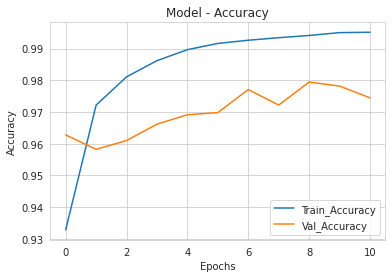

In [120]:
plt.plot(history.history['accuracy'], label="Train_Accuracy")
plt.plot(history.history['val_accuracy'], label = "Val_Accuracy")
plt.title("Model - Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = 4)
plt.show()


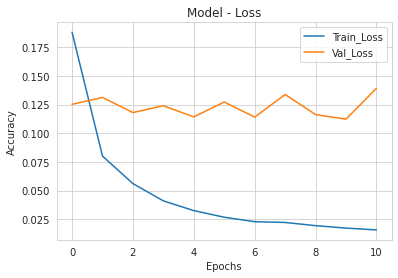

In [121]:
plt.plot(history.history['loss'], label="Train_Loss")
plt.plot(history.history['val_loss'], label = "Val_Loss")
plt.title("Model - Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [127]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = model.predict(X_test)
predictions


array([[1.0000000e+00, 2.6883653e-08, 3.8207780e-15, 2.4057845e-23,
        1.5901349e-20],
       [1.0000000e+00, 1.1733157e-08, 1.2566337e-13, 1.2784489e-15,
        4.0548152e-17],
       [9.9999988e-01, 7.4526476e-08, 4.1894713e-16, 4.6712634e-11,
        1.7113250e-18],
       ...,
       [8.3439427e-12, 1.6304502e-17, 2.4595648e-11, 8.3226913e-27,
        1.0000000e+00],
       [1.7828543e-13, 3.8445576e-19, 1.5008400e-15, 6.1739902e-33,
        1.0000000e+00],
       [1.6725023e-14, 3.4703018e-19, 4.7188755e-12, 9.2439728e-31,
        1.0000000e+00]], dtype=float32)

# **Confusion Matrix**

In [128]:
yhat = np.round(predictions)


In [129]:
yhat

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [130]:
# argmax = converts encoding value into integer class value
np.argmax(yhat, axis = 1)


array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
conf_matrix=

In [131]:
plt.figure(figsize=(15,8))
sns.heatmap(conf_matrix, annot=True, fmt='0.0f')

NameError: ignored

<Figure size 1080x576 with 0 Axes>

In [ ]:
print(classification_report(np.argmax(y_test, axis = 1), np.argmax(yhat, axis = 1)))
